 # The data

In [1]:
import pandas as pd

In [2]:
housing =pd.read_csv('cal_housing_clean.csv')

In [3]:
housing.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y_val =housing['medianHouseValue']

In [6]:
x_data= housing.drop('medianHouseValue', axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_val, test_size=0.3, random_state=101)

In [8]:
#Scale the feature data
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler()

In [10]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [12]:
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [13]:
scaler.transform(X_train)

array([[ -1.26874279e-02,  -4.90948628e-05,  -1.37001357e-04,
         -1.03323552e-04,  -1.45462664e-04,  -2.46473580e-02],
       [ -7.68935025e-03,  -5.05813706e-05,  -1.52750854e-04,
         -1.04738036e-04,  -1.62120965e-04,  -3.13701214e-02],
       [ -6.53594771e-03,  -5.02255920e-05,  -1.50318593e-04,
         -1.04296776e-04,  -1.59470781e-04,  -1.97951732e-02],
       ..., 
       [ -1.76855056e-02,  -4.85877166e-05,  -1.41745472e-04,
         -1.03345615e-04,  -1.51195716e-04,  -7.62047934e-03],
       [ -6.15148020e-03,  -5.03303850e-05,  -1.50125938e-04,
         -1.04366642e-04,  -1.58767671e-04,  -2.12467384e-02],
       [ -1.11495579e-02,  -4.86957439e-05,  -1.37747893e-04,
         -1.02752365e-04,  -1.46868884e-04,  -2.41451127e-02]])

In [14]:
import tensorflow as tf

In [15]:
housing.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object')

In [16]:
age = tf.feature_column.numeric_column('housingMedianAge')
bedrooms = tf.feature_column.numeric_column('totalBedrooms')
pop = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
income = tf.feature_column.numeric_column('medianIncome')

In [17]:
feat_cols=[age, bedrooms, pop, households, income]

In [18]:
input_func= tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size =10, num_epochs = 1000, shuffle=True)

In [19]:
model=tf.estimator.DNNRegressor(hidden_units=[6,6,6], feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_save_summary_steps': 100, '_task_id': 0, '_num_ps_replicas': 0, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\Medusa\\AppData\\Local\\Temp\\tmp0e9f5jud', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024B61ECAE80>, '_keep_checkpoint_max': 5, '_train_distribute': None, '_task_type': 'worker', '_is_chief': True, '_global_id_in_cluster': 0, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 1, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_session_config': None, '_service': None, '_tf_random_seed': None}


In [20]:
model.train(input_func, steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Medusa\AppData\Local\Temp\tmp0e9f5jud\model.ckpt.
INFO:tensorflow:step = 0, loss = 2.81821e+11
INFO:tensorflow:global_step/sec: 436.008
INFO:tensorflow:step = 100, loss = 9.84695e+11 (0.229 sec)
INFO:tensorflow:global_step/sec: 553.968
INFO:tensorflow:step = 200, loss = 5.81299e+11 (0.182 sec)
INFO:tensorflow:global_step/sec: 557.038
INFO:tensorflow:step = 300, loss = 6.72627e+11 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.965
INFO:tensorflow:step = 400, loss = 4.85002e+11 (0.181 sec)
INFO:tensorflow:global_step/sec: 541.986
INFO:tensorflow:step = 500, loss = 3.48113e+11 (0.185 sec)
INFO:tensorflow:global_step/sec: 553.965
INFO:tensorflow:step = 600, loss = 3.41223e+11 (0.181 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 511.567
INFO:tensorflow:step = 7900, loss = 4.68046e+10 (0.197 sec)
INFO:tensorflow:global_step/sec: 519.523
INFO:tensorflow:step = 8000, loss = 1.29899e+11 (0.190 sec)
INFO:tensorflow:global_step/sec: 522.225
INFO:tensorflow:step = 8100, loss = 1.71899e+11 (0.192 sec)
INFO:tensorflow:global_step/sec: 511.568
INFO:tensorflow:step = 8200, loss = 2.8814e+10 (0.194 sec)
INFO:tensorflow:global_step/sec: 516.844
INFO:tensorflow:step = 8300, loss = 1.65629e+11 (0.194 sec)
INFO:tensorflow:global_step/sec: 544.932
INFO:tensorflow:step = 8400, loss = 7.02327e+10 (0.184 sec)
INFO:tensorflow:global_step/sec: 527.727
INFO:tensorflow:step = 8500, loss = 1.00371e+11 (0.189 sec)
INFO:tensorflow:global_step/sec: 550.918
INFO:tensorflow:step = 8600, loss = 5.23704e+10 (0.183 sec)
INFO:tensorflow:global_step/sec: 553.966
INFO:tensorflow:step = 8700, loss = 1.3438e+11 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.918
INFO:tensorflow:step = 8800, loss = 6.80113e+10 (0.1

INFO:tensorflow:global_step/sec: 530.518
INFO:tensorflow:step = 16000, loss = 4.90732e+10 (0.188 sec)
INFO:tensorflow:global_step/sec: 539.07
INFO:tensorflow:step = 16100, loss = 8.89046e+10 (0.186 sec)
INFO:tensorflow:global_step/sec: 533.339
INFO:tensorflow:step = 16200, loss = 1.68922e+11 (0.187 sec)
INFO:tensorflow:global_step/sec: 560.152
INFO:tensorflow:step = 16300, loss = 5.30136e+10 (0.179 sec)
INFO:tensorflow:global_step/sec: 376.944
INFO:tensorflow:step = 16400, loss = 1.27653e+11 (0.264 sec)
INFO:tensorflow:global_step/sec: 560.161
INFO:tensorflow:step = 16500, loss = 7.15682e+10 (0.180 sec)
INFO:tensorflow:global_step/sec: 524.957
INFO:tensorflow:step = 16600, loss = 1.65822e+11 (0.189 sec)
INFO:tensorflow:global_step/sec: 560.158
INFO:tensorflow:step = 16700, loss = 6.02715e+10 (0.180 sec)
INFO:tensorflow:global_step/sec: 541.983
INFO:tensorflow:step = 16800, loss = 5.93762e+10 (0.184 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:step = 16900, loss = 8.368

In [21]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle= False)

In [22]:
pred_gen = model.predict(predict_input_func)

In [23]:
predictions = list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Medusa\AppData\Local\Temp\tmp0e9f5jud\model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [24]:
predictions # Housing price predictions

[{'predictions': array([ 242449.28125], dtype=float32)},
 {'predictions': array([ 327584.1875], dtype=float32)},
 {'predictions': array([ 214736.703125], dtype=float32)},
 {'predictions': array([ 190835.84375], dtype=float32)},
 {'predictions': array([ 288962.125], dtype=float32)},
 {'predictions': array([ 197543.953125], dtype=float32)},
 {'predictions': array([ 226158.234375], dtype=float32)},
 {'predictions': array([ 208262.015625], dtype=float32)},
 {'predictions': array([ 223992.671875], dtype=float32)},
 {'predictions': array([ 207961.34375], dtype=float32)},
 {'predictions': array([ 206186.265625], dtype=float32)},
 {'predictions': array([ 220338.6875], dtype=float32)},
 {'predictions': array([ 194374.484375], dtype=float32)},
 {'predictions': array([ 182048.546875], dtype=float32)},
 {'predictions': array([ 263786.46875], dtype=float32)},
 {'predictions': array([ 184479.390625], dtype=float32)},
 {'predictions': array([ 203016.890625], dtype=float32)},
 {'predictions': array([ 

# Root-Mean-Square-Deviation (RMSD) or Root-Mean-Square-Error (RMSE)
is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.


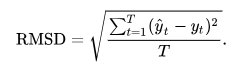


In [25]:
final_preds=[]

for pred in predictions:
    final_preds.append(pred['predictions'])

In [26]:
pred

{'predictions': array([ 234864.75], dtype=float32)}

In [27]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y_test, final_preds)**0.5

97636.786295286031

In [ ]:
# As we can see the created model is not accurarte enough